In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/concatenated.csv")
df

C:\Users\luisc\AppData\Local\Temp\ipykernel_31480\4003299516.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/concatenated.csv")


,dataset,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,b2w,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4.0,1,1
1,b2w,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5.0,1,1
2,b2w,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1.0,1,1
3,b2w,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5.0,1,1
4,b2w,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3.0,-1,1
...,...,...,...,...,...,...,...,...,...
2786087,buscape,1_422965,"Produto muito bom, simples e barato","produto muito bom, simples e barato","['produto', 'muito', 'bom', 'simples', 'barato']",1.0,5.0,10,10
2786088,buscape,minus_1_150466,O esquema antigo de desmontagem e limpeza das ...,o esquema antigo de desmontagem e limpeza das ...,"['esquema', 'antigo', 'de', 'desmontagem', 'li...",NaN,3.0,-1,10
2786089,buscape,0_414799,Esse jogo é muito maneiro é um jogo onde vc te...,esse jogo e muito maneiro e um jogo onde vc te...,"['esse', 'jogo', 'muito', 'maneiro', 'um', 'jo...",1.0,5.0,10,10
2786090,buscape,0_389898,Muito bom e intuitivo!\n\nO que gostei: Educa ...,muito bom e intuitivo!\n\no que gostei: educa ...,"['muito', 'bom', 'intuitivo', 'que', 'gostei',...",NaN,3.0,-1,10


In [4]:
df = df[["review_text"]].rename(columns={"review_text":"texto"})
df

,texto
0,Bem macio e felpudo...recomendo. Preço imbatí...
1,Produto excepcional! recomendo!!! inovador e ...
2,recebi o produto antes do prazo mas veio com d...
3,Bom custo beneficio. Adequado para pessoas que...
4,Além de higiênico tem o tamanho ideal. Só falt...
...,...
2786087,"Produto muito bom, simples e barato"
2786088,O esquema antigo de desmontagem e limpeza das ...
2786089,Esse jogo é muito maneiro é um jogo onde vc te...
2786090,Muito bom e intuitivo!\n\nO que gostei: Educa ...


In [6]:
df = df[~df.texto.isna()].reset_index(drop=True)
df

,texto
0,Bem macio e felpudo...recomendo. Preço imbatí...
1,Produto excepcional! recomendo!!! inovador e ...
2,recebi o produto antes do prazo mas veio com d...
3,Bom custo beneficio. Adequado para pessoas que...
4,Além de higiênico tem o tamanho ideal. Só falt...
...,...
2786086,"Produto muito bom, simples e barato"
2786087,O esquema antigo de desmontagem e limpeza das ...
2786088,Esse jogo é muito maneiro é um jogo onde vc te...
2786089,Muito bom e intuitivo!\n\nO que gostei: Educa ...


In [11]:
print(df.sample(1).texto.values[0])

As vezes quero escalar um jogador de meu time e ele nem aparece, mas depos o cara ta jogando. Aconteceu em varios jogos esse ano.


In [12]:
df["len"] = df.texto.str.len()
df.len.describe().astype(int)

count    2786091
mean         154
std          314
min            1
25%           31
50%           73
75%          163
max       120533
Name: len, dtype: int64

<Axes: >

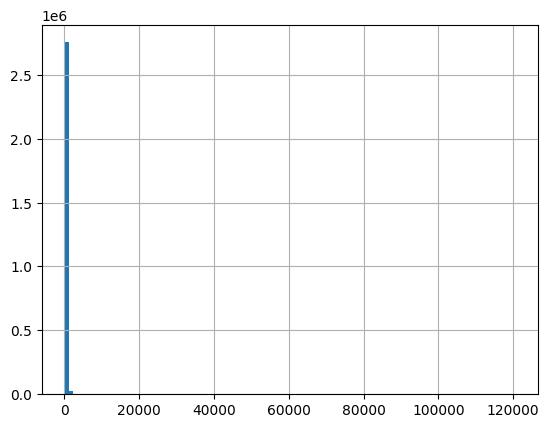

In [13]:
df["len"].hist(bins=100)

In [14]:
df = df[(df["len"] >= 15) & (df["len"] <= 200)].reset_index(drop=True)
df

,texto,len
0,Bem macio e felpudo...recomendo. Preço imbatí...,99
1,Produto excepcional! recomendo!!! inovador e ...,62
2,recebi o produto antes do prazo mas veio com d...,154
3,Bom custo beneficio. Adequado para pessoas que...,195
4,Além de higiênico tem o tamanho ideal. Só falt...,129
...,...,...
1897280,Excelente custo-benefício apresentado por este...,76
1897281,"Game muito legal, com uma grande variedade de ...",96
1897282,"Produto muito bom, simples e barato",35
1897283,Muito bom e intuitivo!\n\nO que gostei: Educa ...,71


<Axes: >

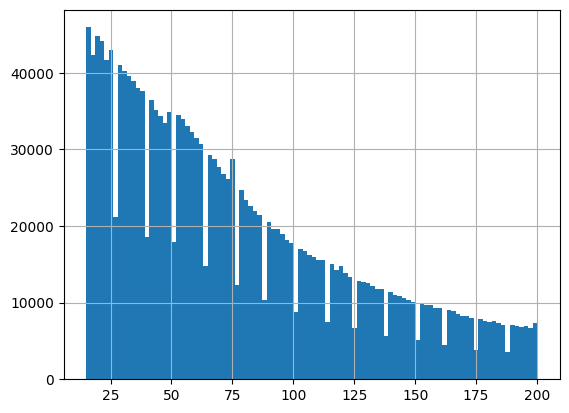

In [15]:
df["len"].hist(bins=100)

In [17]:
split = []

df = df.sample(frac=1.0, replace=False).reset_index(drop=True)

split = ["valid" for _ in range(500)] + ["train" for _ in range(len(df) - 500)]
df["split"] = split

df

,texto,len,split
0,Sempre gosto de comprar no Shoptime e adoro ok.,47,valid
1,O clichê mais tapa na cara que já se viu.,41,valid
2,Eu ñ seiinstalei ainda,22,valid
3,entre as comédias francesas mais engraçadas qu...,123,valid
4,Que filme ruim. Meu Deus.,25,valid
...,...,...,...
1897280,Ótimo este Clean Master!!!,26,train
1897281,Bom mais poderia melhorar,25,train
1897282,"produto sem qualidade , as peças não encaixam ...",118,train
1897283,Isto é uma oportunidade para apanharem dinheir...,73,train


In [18]:
df.to_parquet("data/base_treino.pq")